# **LAB 4 - Một số thuật toán cơ bản của MachineLearning**


1. Linear regersstion
- Biết: Hồi quy tuyến tính là dự đoán giá trị liên tục dựa trên một hoặc nhiều biến đọc lập.

In [ ]:
!pip install scikit-learn

In [ ]:
# sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu fetch califonia
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cali = fetch_california_housing()
X = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target)

In [ ]:

# Chia tập dữ liệu có 80% huấn luyện và 20% kiểm tra.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Dự đoán và đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508


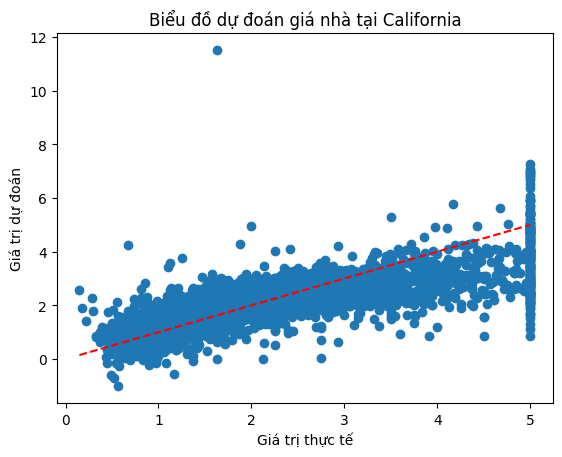

In [ ]:
# trực quan hóa dữ liệu (vẽ biểu đồ)
plt.scatter(y_test, y_pred)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Biểu đồ dự đoán giá nhà tại California")

# đường hồi quy
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

bai thuc hanh

        x        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       97 non-null     float64
 1   y       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None
R^2 score: 0.500344113338578


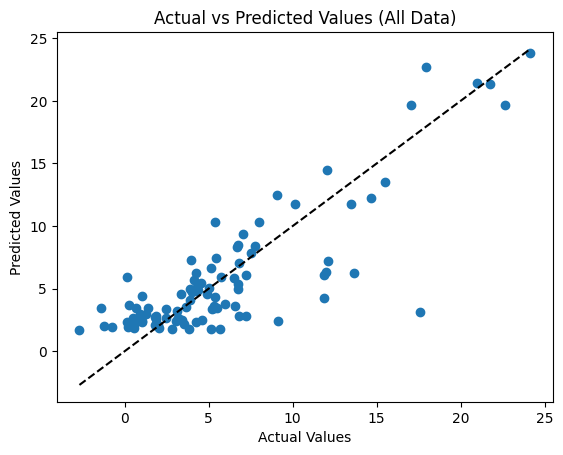

Mean Squared Error: 15.709362447765187


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Định nghĩa tên cột
column_names = ["x", "y"]

# Đọc file CSV và đặt tên cột
df = pd.read_csv('/content/lab1data1.csv', names=column_names, on_bad_lines='skip')

# Kiểm tra dữ liệu
print(df.head())
print(df.info())

# Chuyển đổi kiểu dữ liệu (nếu cần)
df["x"] = pd.to_numeric(df["x"], errors="coerce")
df["y"] = pd.to_numeric(df["y"], errors="coerce")
df.dropna(inplace=True)  # Xóa dòng có giá trị NaN

# Chia thành X, y
X = df[["x"]]  # Chuyển thành DataFrame
y = df["y"]    # Chuyển thành Series

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá trị
y_pred = model.predict(X_test)

# Tính R^2 score
r2 = model.score(X_test, y_test)
print("R^2 score:", r2)

# Vẽ đồ thị
y_all_pred = model.predict(X)
plt.scatter(y, y_all_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (All Data)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.axis('tight')
plt.show()

# Tính Mean Squared Error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


hồi quy logistic
phân loại nhi phân hoặc đa lớp dựa vào đặc trưng

In [ ]:
# Xây dựng mô hình LG để phân loại nhị phân trong dữ liệu breast Canner

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load data
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['target'])

In [ ]:
# Chia tập dữ liệu thành tập huấn luyện 75% và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:

# Xây dựng và huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

[[51  3]
 [ 2 87]]


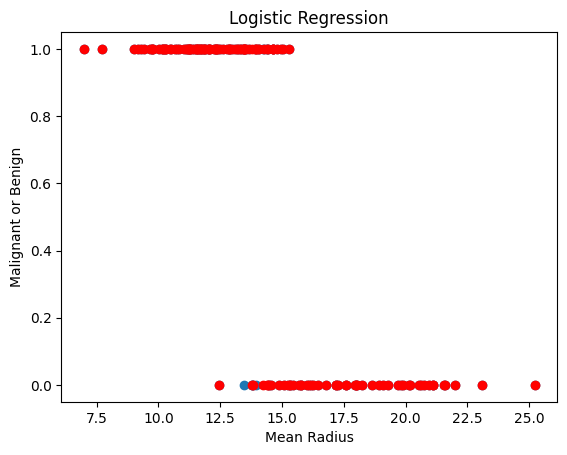

In [ ]:
plt.scatter(X_test['mean radius'], y_test)
plt.scatter(X_test['mean radius'], y_pred, color='red')
plt.xlabel('Mean Radius')
plt.ylabel('Malignant or Benign')
plt.title('Logistic Regression')

plt.show()

3. Phân cụm
- Nhóm các đối tượng có đặc điểm tương đồng mà không cần gán nhãn.

In [ ]:
#  Sử dụng data Iris để phân cụm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Load dữ liệu Iris
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # 4 đặc trưng
y = pd.DataFrame(iris.target, columns=['target'])  # Nhãn thật để so sánh

In [ ]:
# Áp dụng K-Means với số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
# Sử dụng PCA để giảm chiều (từ 4 xuống 2)
pca = PCA(n_components=2)  # Giảm xuống còn 2 chiều
X_pca = pca.fit_transform(X)  # Biến đổi dữ liệu

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


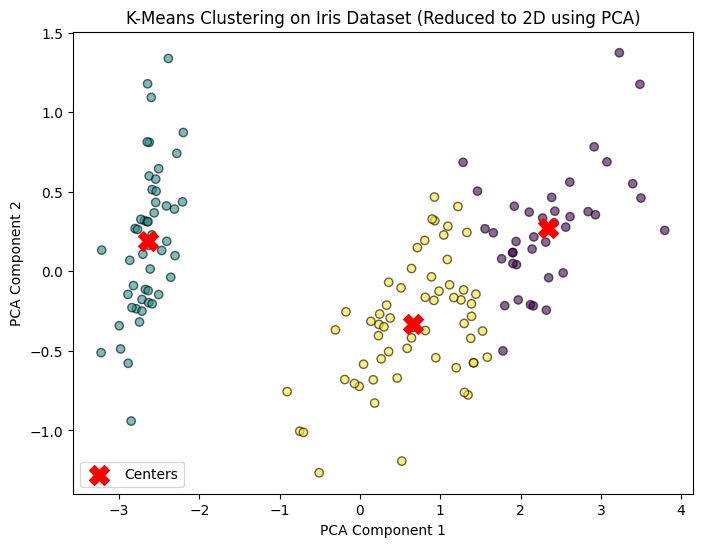

In [ ]:
# Chuyển đổi tọa độ tâm cụm về 2 chiều bằng PCA
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# Vẽ biểu đồ phân cụm sau khi giảm chiều
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6, edgecolors='k')

# Vẽ tâm cụm đã được chuyển đổi
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='X', s=200, label='Centers')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on Iris Dataset (Reduced to 2D using PCA)')
plt.legend()
plt.show()


bài tập về nhà


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Đọc dữ liệu
df = pd.read_csv('/content/framingham.csv')

In [3]:
# Loại bỏ các hàng có giá trị NaN trong các cột đặc trưng và nhãn
features = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df = df.dropna(subset=features + ['TenYearCHD'])

In [4]:
# Chọn các cột đặc trưng và nhãn
X = df[features]
y = df['TenYearCHD']


In [5]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [9]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)

Accuracy: 0.8523
Confusion Matrix:
 [[647   7]
 [106   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       654
           1       0.42      0.05      0.08       111

    accuracy                           0.85       765
   macro avg       0.64      0.52      0.50       765
weighted avg       0.80      0.85      0.80       765



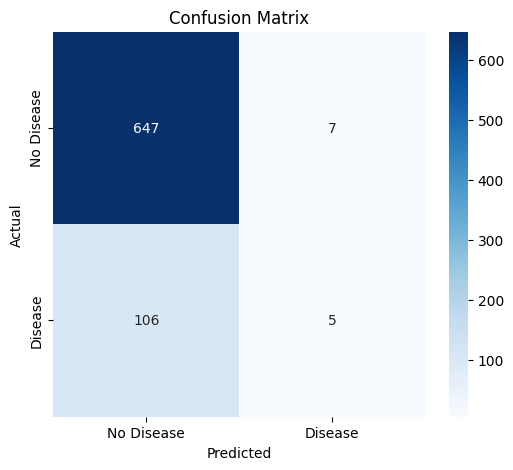

In [10]:
# Vẽ heatmap cho ma trận nhầm lẫn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

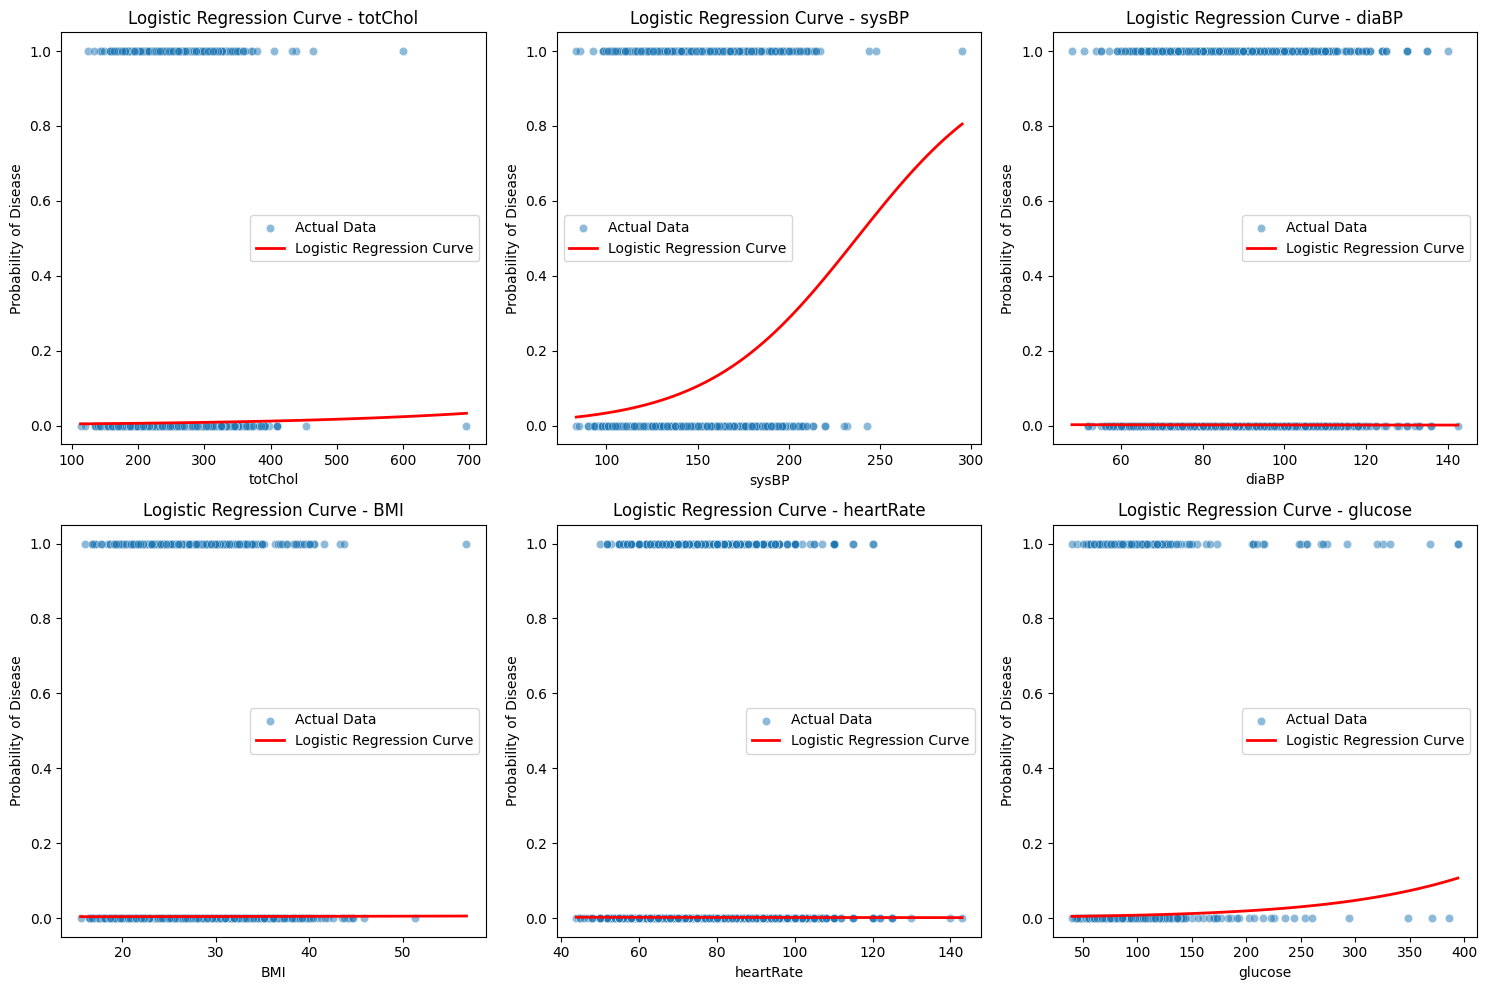

In [11]:
features_to_plot = ['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    x_vals = np.linspace(df[feature].min(), df[feature].max(), 100).reshape(-1, 1)
    x_scaled = scaler.transform(np.column_stack([np.zeros_like(x_vals) if f != feature else x_vals for f in features]))
    y_probs = model.predict_proba(x_scaled)[:, 1]

    sns.scatterplot(x=df[feature], y=df['TenYearCHD'], alpha=0.5, label='Actual Data')
    plt.plot(x_vals, y_probs, color='red', linewidth=2, label='Logistic Regression Curve')
    plt.xlabel(feature)
    plt.ylabel('Probability of Disease')
    plt.title(f'Logistic Regression Curve - {feature}')
    plt.legend()

plt.tight_layout()
plt.show()
